In [1]:
# %pip install numpy
# %pip install scikit-learn
# %pip install matplotlib

In [2]:
# Add libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [10]:
class SVM:
    def __init__(self, lr=0.99, lambda_p=0.5, n_iters=1000):
        self.lr = lr
        self.lambda_p = lambda_p
        self.n_iters = n_iters
        self.w = None
        self.b = None

    # Take input 
    def initialize_dataset(self, num_samples, num_features):
        X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
        y = np.where(y == 0, -1, 1)
        return X, y

    # Initialize weight and bias
    def initialize_weights(self, num_features):
        self.w = np.random.rand(num_features)
        self.b = 0

    # Train SVM
    def fit(self):
        X, y = self.initialize_dataset(num_samples=50, num_features=2)
        num_samples, num_features = X.shape
        
        self.initialize_weights(num_features)
    
        # Implement gradient descent. Calculate loss and update weights
        for i in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(X[idx], self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_p * self.w)
                else:
                    self.w -= self.lr * ((2 * self.lambda_p * self.w) - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

        return X, y, self.w, self.b

    # Predict label
    def predict(self):
        x, y = datasets.make_blobs(n_samples=1, n_features=2, centers=2, cluster_std=1.05, random_state=40)
        y = np.where(y == 0, -1, 1)
        approx = np.dot(x, self.w) - self.b
        return x, y, np.sign(approx)

    
    def get_hyperplane(self, x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
        

    def plot_svm(self, X, y, w, b, title ='Plot for linear SVM'):    

        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        plt.scatter(X[:,0], X[:,1], marker='o',c=y)
    
        x0_1 = np.amin(X[:,0])
        x0_2 = np.amax(X[:,0])
    
        x1_1 = self.get_hyperplane(x0_1, w, b, 0)
        x1_2 = self.get_hyperplane(x0_2, w, b, 0)
    
        x1_1_m = self.get_hyperplane(x0_1, w, b, -1)
        x1_2_m = self.get_hyperplane(x0_2, w, b, -1)
    
        x1_1_p = self.get_hyperplane(x0_1, w, b, 1)
        x1_2_p = self.get_hyperplane(x0_2, w, b, 1)
    
        ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
        ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
        ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')
    
        x1_min = np.amin(X[:,1])
        x1_max = np.amax(X[:,1])
        ax.set_ylim([x1_min-3,x1_max+3])
        
        plt.title(title)
        plt.show()

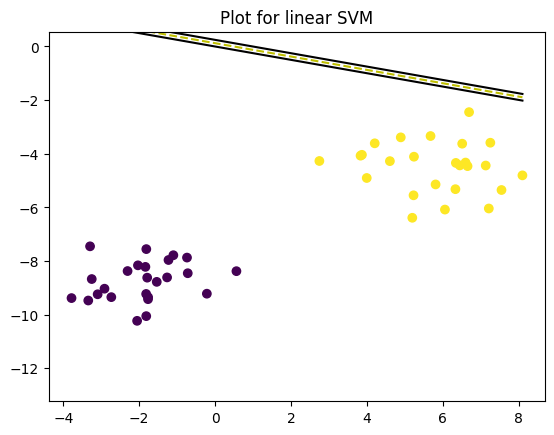

In [11]:
svm = SVM()
x, y, w, b = svm.fit()
svm.predict()
svm.plot_svm(x, y, w, b)